# Import Libraries

In [1]:
import numpy as np # linear algebra
import os
from tqdm import tqdm
from tensorflow import keras
import cv2
from sklearn.utils import shuffle
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
import matplotlib.pyplot as plt

# Load and Preprocess data

In [2]:
labels = ['Covid','Normal','Viral Pneumonia']

In [3]:
print("pre-processing data\n")
image_data = []
label_data = []
image_size = 150
data_dirs = ["train", "test"]  # List of directories to load data from
for data_dir in data_dirs:
    for i in labels:
        data_path = os.path.join("/kaggle/input/covid19-image-dataset/Covid19-dataset/", data_dir, i)
        for m in tqdm(os.listdir(data_path)):
            image = cv2.imread(os.path.join(data_path, m))
            image = cv2.resize(image, (image_size, image_size))
            image_data.append(image)
            label_data.append(i)
image_data = np.array(image_data)
label_data = np.array(label_data)

pre-processing data



100%|██████████| 20/20 [00:00<00:00, 67.82it/s]


In [4]:
image_data,label_data=shuffle(image_data,label_data,random_state=42)
X_train,X_test,Y_train,Y_test=train_test_split(image_data,label_data,test_size=0.2,random_state=42)

In [5]:
train_label_data_new=[]
test_label_data_new=[]
for n in Y_train:
    train_label_data_new.append(labels.index(n))
Y_train=train_label_data_new
Y_train=to_categorical(Y_train)
    
for n in Y_test:
    test_label_data_new.append(labels.index(n))
Y_test=test_label_data_new
Y_test=to_categorical(Y_test)

# VGG16 Model

In [6]:
vgg = VGG16(input_shape=(150,150,3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)
modelvgg = Model(inputs=vgg.input, outputs=prediction)
modelvgg.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │          24,579 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,739,267 (56.23 MB)

 Trainable params: 24,579 (96.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [7]:
modelvgg.compile(optimizer='adam',
loss=tensorflow.losses.CategoricalCrossentropy(),
metrics=[keras.metrics.AUC(name='auc')])
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=8,
                                            restore_best_weights=True)

In [8]:
history=modelvgg.fit(X_train,Y_train,
 epochs=10,batch_size= 10,
 validation_data=(X_test,Y_test), callbacks=callback)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 13s 267ms/step - auc: 0.7805 - loss: 4.5844 - val_auc: 0.9199 - val_loss: 2.5683
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - auc: 0.9887 - loss: 0.2597 - val_auc: 0.9585 - val_loss: 2.0517
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 0.9992 - loss: 0.0086 - val_auc: 0.9231 - val_loss: 3.2550
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 0.9864 - loss: 0.3052 - val_auc: 0.8939 - val_loss: 4.3323
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 0.9790 - loss: 0.4097 - val_auc: 0.9161 - val_loss: 3.6151
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 0.9943 - loss: 0.1389 - val_auc: 0.9600 - val_loss: 3.0103
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 0.9982 - loss: 0.0476 - val_auc: 0.9277 - val_loss: 4.1087
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 0.9976 - loss: 0.0389 - val_auc: 0.9407 - val_loss: 2.6388
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - auc: 1.00

# Accuracy and Loss

In [9]:
loss, accuracy = modelvgg.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - auc: 0.9922 - loss: 0.1051
Train Loss:  0.11644425988197327
Train Accuracy:  0.9910832643508911


In [10]:
loss, accuracy = modelvgg.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - auc: 0.9468 - loss: 2.6653
Test Loss:  2.051748752593994
Test Accuracy:  0.95849609375


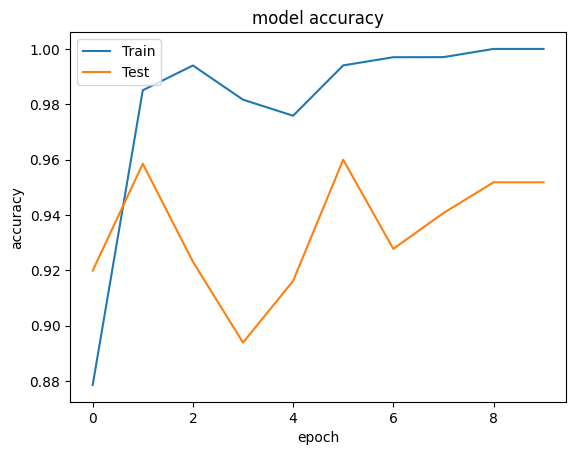

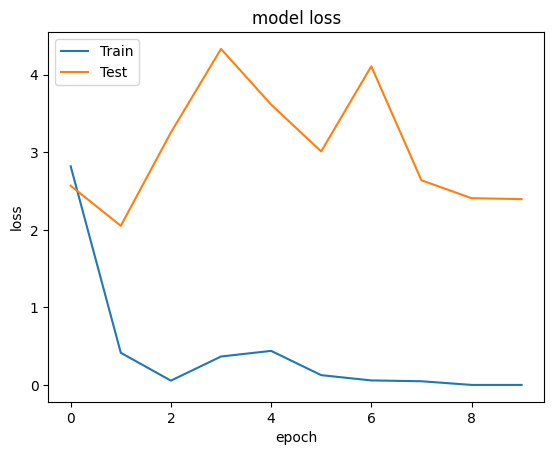

In [11]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Confusion Matrix & Classification Report

In [12]:
predictions = modelvgg.predict(X_test)
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
display_c_m = ConfusionMatrixDisplay(cm, display_labels=labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step 
[[21  0  1]
 [ 0 23  2]
 [ 0  5 12]]


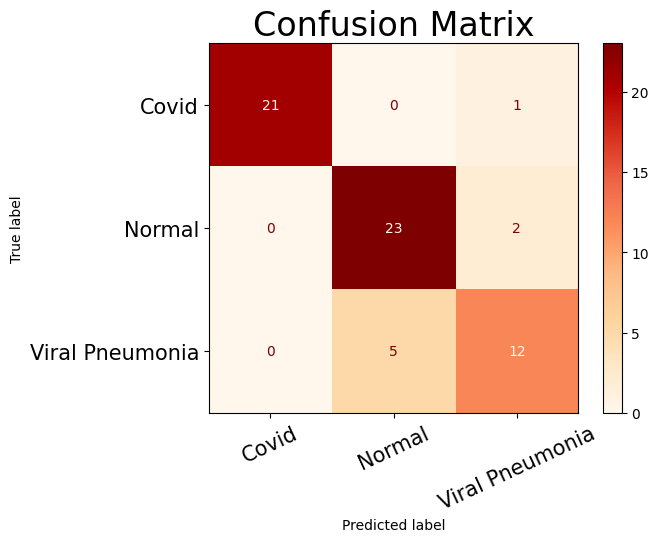

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.82      0.92      0.87        25
           2       0.80      0.71      0.75        17

    accuracy                           0.88        64
   macro avg       0.87      0.86      0.86        64
weighted avg       0.88      0.88      0.87        64



In [13]:
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.show()
print(classification_report(y_test, y_pred))